In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
! pip install flask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
! pip freeze

In [2]:
df = pd.read_csv('2018-2022.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789 entries, 0 to 15788
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     15789 non-null  int64  
 1   LURN_SAK       15789 non-null  int64  
 2   INCIDENT_DATE  15789 non-null  object 
 3   CATEGORY       15789 non-null  object 
 4   STAT           15789 non-null  int64  
 5   ADDRESS        15789 non-null  object 
 6   LONGITUDE      15789 non-null  float64
 7   LATITUDE       15789 non-null  float64
 8   PART_CATEGORY  15789 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [59]:
df.head(5)

,LURN_SAK,INCIDENT_DATE,CATEGORY,STAT,ADDRESS,LONGITUDE,LATITUDE,PART_CATEGORY
0,18615198,06/19/2018 03:00:00 AM,GRAND THEFT AUTO,91,"1300 HARPER AVE, WEST HOLLYWOOD, CA",-118.368,34.095,1
1,18542039,04/08/2018 09:35:00 PM,AGGRAVATED ASSAULT,54,"600 ROBERTSON BLVD, WEST HOLLYWOOD, CA 90069",-118.385,34.080,1
2,18700869,09/18/2018 10:00:00 AM,VANDALISM,263,"7300 SANTA MONICA BLVD, WEST HOLLYWOOD, CA 90069",-118.351,34.092,2
3,18695878,09/12/2018 06:30:00 AM,LARCENY THEFT,386,"1000 CROFT AVE, WEST HOLLYWOOD, CA 90046",-118.374,34.089,1
4,18700046,09/17/2018 11:00:00 AM,LARCENY THEFT,389,"500 N LA CIENEGA BLVD, WEST HOLLYWOOD, CA 90048",-118.376,34.080,1


In [6]:
cat = df['CATEGORY'].value_counts()

In [2]:
import folium
from folium import plugins
import osmnx as ox
import networkx as nx
import shapely
import geopandas as gpd
from shapely.geometry import CAP_STYLE, JOIN_STYLE, LineString
import numpy as np

In [60]:
#to simplify just select crime coords ...gotta swap Lat and long here
crimes=list(zip(df['LONGITUDE'].dropna(), df['LATITUDE'].dropna()))

In [61]:
crimes

[(-118.368, 34.095),
 (-118.385, 34.08),
 (-118.351, 34.092),
 (-118.374, 34.089),
 (-118.376, 34.08),
 (-118.379, 34.087),
 (-118.351, 34.092),
 (-118.377, 34.088),
 (-118.374, 34.082),
 (-118.382, 34.08),
 (-118.373, 34.082),
 (-118.366, 34.09),
 (-118.383, 34.081),
 (-118.361, 34.089),
 (-118.376, 34.094),
 (-118.355, 34.09),
 (-118.35, 34.09),
 (-118.385, 34.087),
 (-118.35, 34.09),
 (-118.344, 34.09),
 (-118.351, 34.092),
 (-118.367, 34.089),
 (-118.356, 34.09),
 (-118.345, 34.092),
 (-118.381, 34.091),
 (-118.357, 34.09),
 (-118.383, 34.084),
 (-118.354, 34.09),
 (-118.351, 34.09),
 (-118.383, 34.084),
 (-118.388, 34.082),
 (-118.354, 34.089),
 (-118.383, 34.084),
 (-118.376, 34.081),
 (-118.344, 34.09),
 (-118.36, 34.089),
 (-118.358, 34.09),
 (-118.375, 34.09),
 (-118.347, 34.09),
 (-118.368, 34.094),
 (-118.344, 34.09),
 (-118.357, 34.089),
 (-118.386, 34.082),
 (-118.383, 34.082),
 (-118.359, 34.089),
 (-118.357, 34.09),
 (-118.383, 34.085),
 (-118.373, 34.091),
 (-118.382, 3

In [10]:
#([(x, y) for (x, y) in crimes if 34.08 < x < 34.09 and y < -118.38])

In [7]:
#m_dt = folium.Map(location=[34.09,-118.36], zoom_start=14)

In [17]:
#test for polyline
loc = [(34.087, -118.381),
       (34.085, -118.381)]

folium.PolyLine(loc,
                color='red',
                weight=5,
                opacity=0.8).add_to(m_dt)

In [62]:
ox.config(log_console=True, use_cache=True)

G_walk = ox.graph_from_place('West Hollywood, Los Angeles County, California, United States',
                             network_type='walk')

#TO DO: define orig node from input address
orig_node = ox.distance.nearest_nodes(G_walk,-118.381,
                                    34.091 )

#TO DO: define dest node from input address
dest_node = ox.distance.nearest_nodes(G_walk, -118.368,	34.095)


route = nx.shortest_path(G_walk, #returns a sequence of nodes
                         orig_node,
                         dest_node,
                         weight='length')
#create a map
m_dt = folium.Map(location=[34.09,-118.36], zoom_start=14)

#add route to map
route_map = ox.plot_route_folium(G_walk, route, m_dt)

#save as html, may be useful when makign a web page
route_map.save('route.html')

/home/jovyan/conda-envs/ox/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [63]:
m_dt

In [64]:
#route is represented as a list of nodes
route

[4808182750,
 4808182751,
 4808182754,
 3803334349,
 1102339749,
 3803335264,
 4808182013,
 123082128,
 255025671,
 123082123,
 4808158275,
 4808158284,
 4015278671,
 122570929,
 5167062420,
 123082121,
 4015278672,
 5167064044,
 21569378,
 4341855726,
 2614047812,
 122656900,
 122656896,
 123546398,
 123342182,
 123058471]

In [65]:
#all graph nodes in the area (west hollywood)
graph_nodes = ox.graph_to_gdfs(G_walk, nodes=True, edges=False)



#obtain series of coordinates from a single route (list of nodes) - gives geopandas series
route_coord = graph_nodes.query('index in @route')['geometry']

#convert list of nodes into a GPD dataframe and join to route_coordinates to maintain correct index(node) order
nodes_gpd = gpd.GeoDataFrame(index=route)
route_geo = nodes_gpd.join(route_coord)

In [66]:
graph_nodes

,y,x,highway,street_count,geometry
osmid,,,,,
21569378,34.095230,-118.372722,traffic_signals,3,POINT (-118.37272 34.09523)
21569384,34.090635,-118.385543,traffic_signals,4,POINT (-118.38554 34.09064)
21569386,34.090477,-118.392348,traffic_signals,5,POINT (-118.39235 34.09048)
24960535,34.090697,-118.344075,traffic_signals,4,POINT (-118.34407 34.09070)
122418931,34.091339,-118.365892,NaN,3,POINT (-118.36589 34.09134)
...,...,...,...,...,...
9774314226,34.084108,-118.384317,NaN,3,POINT (-118.38432 34.08411)
9803618789,34.078169,-118.380422,NaN,3,POINT (-118.38042 34.07817)
9867395496,34.079183,-118.380546,NaN,3,POINT (-118.38055 34.07918)


In [13]:
route_geo

,geometry
4808182750,POINT (-118.38098 34.09130)
4808182751,POINT (-118.38082 34.09137)
4808182754,POINT (-118.38103 34.09170)
3803334349,POINT (-118.38059 34.09187)
1102339749,POINT (-118.37955 34.09234)
3803335264,POINT (-118.37870 34.09285)
4808182013,POINT (-118.37866 34.09288)
123082128,POINT (-118.37832 34.09311)
255025671,POINT (-118.37789 34.09341)
123082123,POINT (-118.37643 34.09437)


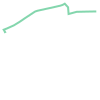

In [14]:
#setting for polygon geometry
CAP_STYLE.round
JOIN_STYLE.round

#create linestring object (compatible with shapely) from route coordinates
route_line = LineString( [[a.x, a.y] for a in route_geo['geometry']] )
#route_coord
route_line

In [15]:
length = int(sum(ox.utils_graph.get_route_edge_attributes(G_walk, route, "length")))
length

1563

In [67]:
sleeve = route_line.buffer(0.0005)

#plot the sleeve on map
folium.GeoJson(sleeve).add_to(m_dt)

In [101]:
m_dt

In [3]:
from shapely import geometry

In [151]:
#count crimes in the selected area
count = 0

for loc in crimes:
    pt = geometry.Point(loc)
    if sleeve.contains(pt):
        count += 1

count

378

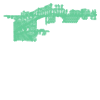

In [39]:
x = LineString()
for g in linestrings:
    x = LineString.union(x, g)

x

#if we take every edge in the area, its weight can be computed as num of crimes around it

In [22]:
#G = ox.graph_from_bbox( 34.091, 34.095, -118.381, -118.368, network_type='walk')
edges_gdf = ox.graph_to_gdfs(G_walk, nodes=False, edges=True)
edges_gdf = edges_gdf[['osmid', 'length', 'geometry']]

In [25]:
#edges = ox.graph_to_gdfs(G_walk, nodes=False, edges=True)


In [137]:
geometry = edges_gdf['geometry'].values[1]
test = list(geometry.coords)

In [140]:
test

[(-118.3727224, 34.0952298),
 (-118.3728251, 34.0952055),
 (-118.3731327, 34.0951333),
 (-118.3735928, 34.0950309)]

In [18]:
crimes_loc = [geometry.Point(loc) for loc in crimes]

In [23]:
def CrimeLevel(geometry):
    edge_line = LineString(geometry)
    sleeve = edge_line.buffer(0.0005)
    
    count = 0
    for pt in crimes_loc:
        if sleeve.contains(pt):
            count += 1
    
    return count

In [24]:
edges_gdf['weight'] = edges_gdf['geometry'].apply(CrimeLevel)

In [25]:
edges_gdf

osmid  length  \
u          v          key                                              
21569378   4341855726 0                            185720604  33.594   
           5167064044 0               [398790803, 400020966]  83.145   
21569384   2614048061 0                [526747217, 13430661]  46.491   
           123041372  0    [398794498, 400020548, 398794500]  99.503   
           8749647667 0                            398794501  20.278   
...                                                      ...     ...   
9898915121 2005576736 0                             13358227  49.665   
           9898915122 0                           1079931612  44.618   
9898915122 122513877  0                            849717520  49.562   
           9898915121 0                           1079931612  44.618   
           122685010  0                            849717520  52.681   

                                                                    geometry  \
u          v          key                                                      
21569378   4341855726 0    LINESTRING (-118.37272 34.09523, -118.37247 34...   
           5167064044 0    LINESTRING (-118.37272 34.09523, -118.37283 34...   
21569384   2614048061 0    LINESTRING (-118.38554 34.09064, -118.38554 34...   
           123041372  0    LINESTRING (-118.38554 34.09064, -118.38543 34...   
           8749647667 0    LINESTRING (-118.38554 34.09064, -118.38565 34...   
...                                                                      ...   
9898915121 2005576736 0    LINESTRING (-118.38518 34.08160, -118.38468 34...   
           9898915122 0    LINESTRING (-118.38518 34.08160, -118.38500 34...   
9898915122 122513877  0    LINESTRING (-118.38500 34.08122, -118.38450 34...   
           9898915121 0    LINESTRING (-118.38500 34.08122, -118.38518 34...   
           122685010  0    LINESTRING (-118.38500 34.08122, -118.38504 34...   

                           weight  
u          v          key          
21569378   4341855726 0        42  
           5167064044 0        51  
21569384   2614048061 0         1  
           123041372  0        26  
           8749647667 0         1  
...                           ...  
9898915121 2005576736 0        24  
           9898915122 0        97  
9898915122 122513877  0        73  
           9898915121 0        97  
           122685010  0        73  

[2920 rows x 4 columns]

In [35]:
test_gdf = edges_gdf.droplevel('key')
test_gdf = test_gdf.set_index(['weight'], append=True)

In [39]:
list(test_gdf.index)

[(21569378, 4341855726, 42),
 (21569378, 5167064044, 51),
 (21569384, 2614048061, 1),
 (21569384, 123041372, 26),
 (21569384, 8749647667, 1),
 (21569384, 7409615712, 0),
 (21569386, 122958758, 0),
 (21569386, 123082145, 0),
 (21569386, 6807665598, 38),
 (21569386, 5852232556, 38),
 (24960535, 1860234717, 115),
 (24960535, 1860234738, 115),
 (24960535, 538980046, 960),
 (24960535, 123174670, 153),
 (122418931, 122419003, 38),
 (122418931, 7927353845, 20),
 (122418931, 9409528291, 20),
 (122418936, 7821905738, 31),
 (122418936, 123519297, 51),
 (122418936, 612936104, 51),
 (122419003, 7907306456, 18),
 (122419003, 122418931, 38),
 (122419003, 8266890407, 18),
 (122419003, 7907306465, 18),
 (122513877, 3881911252, 47),
 (122513877, 2005576736, 24),
 (122513877, 9898915122, 73),
 (122554561, 122992156, 30),
 (122554561, 123174670, 54),
 (122554561, 8405564770, 41),
 (122554561, 538980052, 63),
 (122554563, 123174673, 32),
 (122554563, 8405564770, 25),
 (122558496, 123243151, 6),
 (12255849

In [40]:
G_walk.add_weighted_edges_from(list(test_gdf.index))

In [68]:
ox.config(log_console=True, use_cache=True)


#TO DO: define orig node from input address
orig_node = ox.distance.nearest_nodes(G_walk,-118.381,
                                    34.091 )

#TO DO: define dest node from input address
dest_node = ox.distance.nearest_nodes(G_walk, -118.368,	34.095)


route2 = nx.shortest_path(G_walk, #returns a sequence of nodes
                         orig_node,
                         dest_node,
                         weight='weight')
#create a map
m_dt = folium.Map(location=[34.09,-118.36], zoom_start=14)

#add route to map
route_map = ox.plot_route_folium(G_walk, route2, m_dt)

/home/jovyan/conda-envs/ox/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [69]:
m_dt

In [54]:
length = int(sum(ox.utils_graph.get_route_edge_attributes(G_walk, route, "length")))
length

1563

In [55]:
length = int(sum(ox.utils_graph.get_route_edge_attributes(G_walk, route2, "length")))
length

1827

In [58]:
weight = int(sum(ox.utils_graph.get_route_edge_attributes(G_walk, route2, attribute="weight")))

KeyError: 'weight'

In [12]:
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra

In [ ]:
#crime points
m_dt = folium.Map(location=[34.09,-118.36], zoom_start=14)
crimes=list(zip(df['LATITUDE'].dropna(), df['LONGITUDE'].dropna()))

for i in range(len(crimes)):
    folium.CircleMarker(location=crimes[i], radius=1, tooltip=crimes[i]).add_to(m_dt)
m_dt

In [ ]:
#clustered crimes
m = folium.Map(location = [34.1, -118.4], tiles='OpenStreetMap')
crimes=list(zip(df['LATITUDE'].dropna(), df['LONGITUDE'].dropna()))

cluster = plugins.MarkerCluster(locations=crimes)  
m.add_child(cluster)